<a href="https://colab.research.google.com/github/ilu25/2023-02-ML-Novice-Study/blob/main/%5Bweek6%5D/%5BMLNovice%5D%EC%A1%B0%EC%84%B8%EC%98%81_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
# 28 x 28 -> 28 x 28 x 1 (48000은 그대로)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


## 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

In [ ]:
# 필터 개수 = 32, 채널 차원에 맞춰 커널의 마지막 차원 자동 지정
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())   # 입력 배열 1차원으로 펼침
model.add(keras.layers.Dense(100, activation='relu'))   # 완전 연결
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()   # 완전 연결층은 파라미터 엄청 큼

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

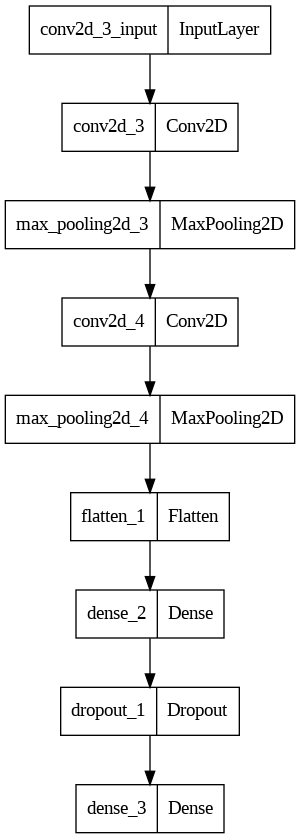

In [ ]:
keras.utils.plot_model(model)

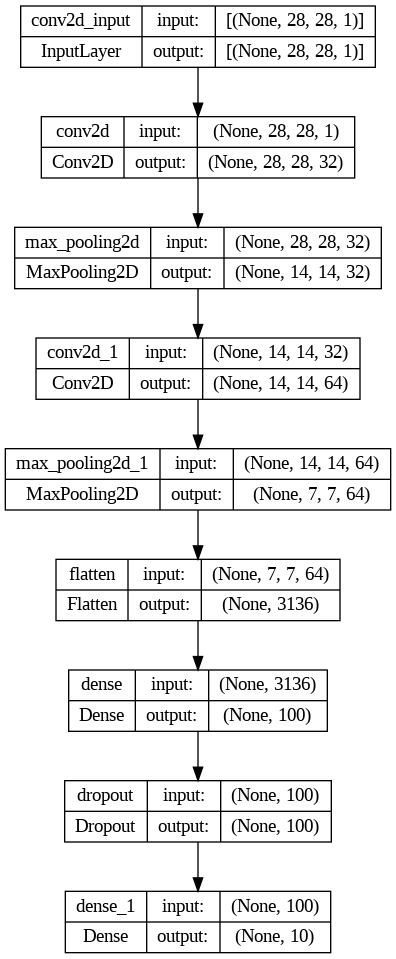

In [ ]:
keras.utils.plot_model(model, show_shapes=True)   # 인풋, 아웃풋 크기도 보여줌

## 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5294 - accuracy: 0.8118 - val_loss: 0.3378 - val_accuracy: 0.8765
Epoch 2/20
  20/1500 [..............................] - ETA: 8s - loss: 0.3948 - accuracy: 0.8484

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.3584 - accuracy: 0.8715 - val_loss: 0.2811 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3046 - accuracy: 0.8911 - val_loss: 0.2593 - val_accuracy: 0.9029
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2734 - accuracy: 0.9021 - val_loss: 0.2381 - val_accuracy: 0.9110
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2485 - accuracy: 0.9100 - val_loss: 0.2367 - val_accuracy: 0.9155
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2243 - accuracy: 0.9168 - val_loss: 0.2280 - val_accuracy: 0.9153
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2096 - accuracy: 0.9222 - val_loss: 0.2242 - val_accuracy: 0.9188
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1922 - accuracy: 0.9291 - val_loss: 0.2236 - val_accuracy: 0.9227
Epo

In [ ]:
import matplotlib.pyplot as plt

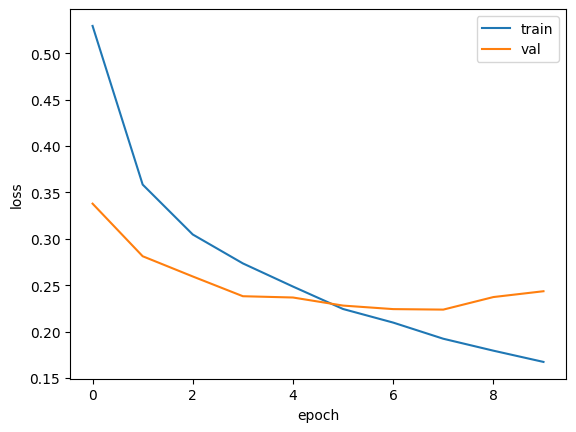

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2236 - accuracy: 0.9227


[0.22363591194152832, 0.9226666688919067]

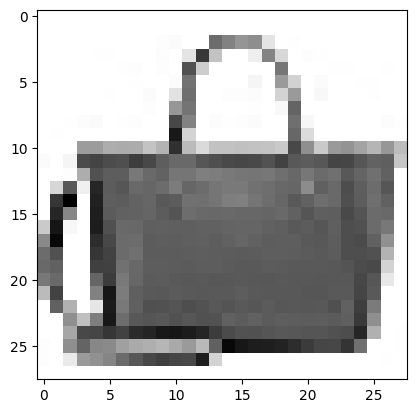

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])    # 첫 번째 배치 차원 (1x28x28x1 이미지 전달)
print(preds)    # 10개의 확률 출력 (9번째 원소로 예측)

1/1 [==============================] - 0s 110ms/step
[[2.1746011e-20 4.2111433e-27 6.5540634e-22 1.3460044e-18 2.2281244e-20
  2.7512839e-19 1.3746263e-19 2.5038630e-16 1.0000000e+00 5.9531822e-19]]


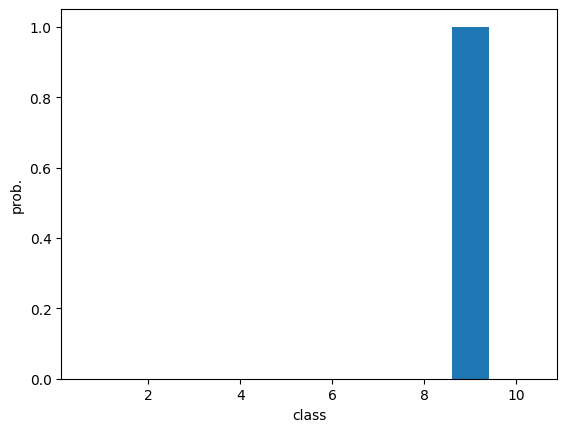

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
# 테스트 세트
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2450 - accuracy: 0.9134


[0.24503764510154724, 0.9133999943733215]

# 합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [2]:
from tensorflow import keras

In [3]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-12-08 09:32:39--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-12-08 09:32:39--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2023-12-08 09:32:40 (52.2 MB/s) - ‘best-cnn-model.h5’ saved [4046712/4046712]



In [4]:
model = keras.models.load_model('best-cnn-model.h5')

In [5]:
model.layers

In [6]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)   # 0: 가중치, 1: 절편

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.02494116 0.24951957


In [8]:
import matplotlib.pyplot as plt

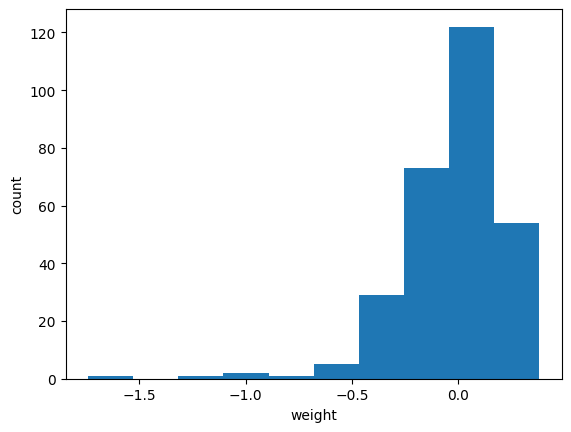

In [9]:
plt.hist(conv_weights.reshape(-1, 1))   # 열 벡터
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

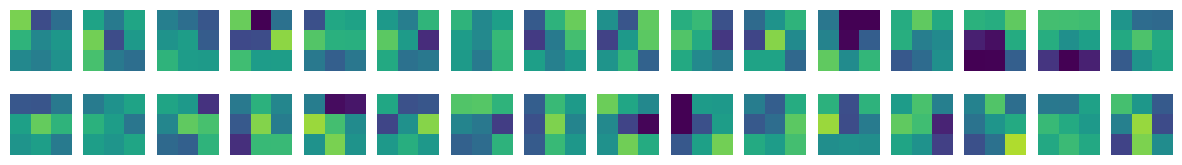

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# imshow: 최솟값은 가장 어둡게, 최댓값은 가장 밝게 표현
# vmin, vmax: 동일한 기준으로 색이 칠해지게끔
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [11]:
# 층만 만듦
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [12]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


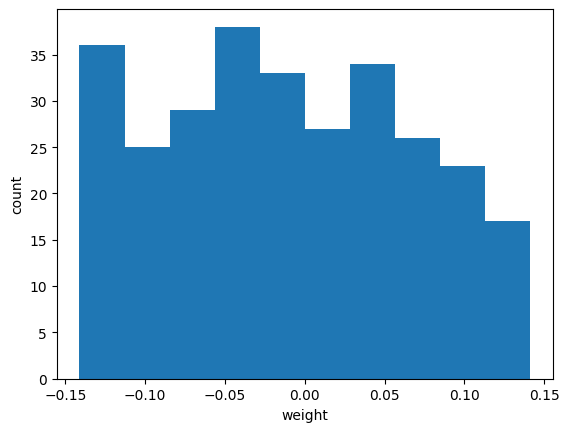

In [14]:
# 층 만들어질 때 보통 균등 분포로 초기화됨 (0에 가까운 작은 실수)
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

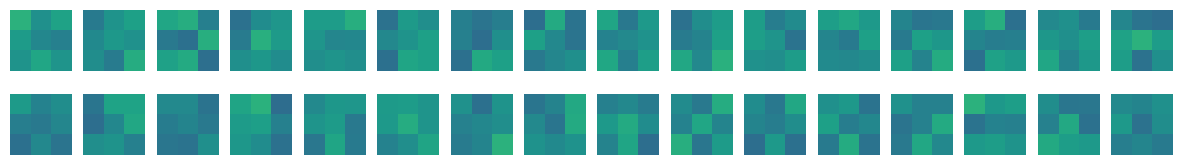

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

In [20]:
# Keras: input 층을 지정해줘야 함
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [21]:
# 왼: 입력층, 오: Conv2D의 활성화 출력
# 함수형 API 특징: 모델의 일부분을 잘라서 확인 가능
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

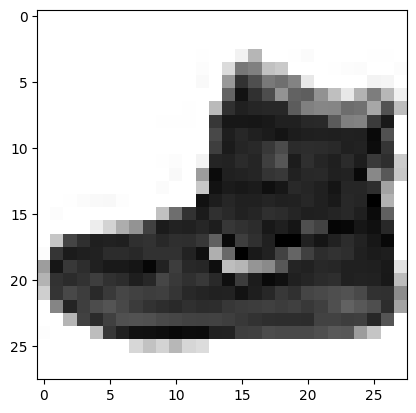

In [23]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [24]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 7s 7s/step


In [25]:
print(feature_maps.shape)

(1, 28, 28, 32)


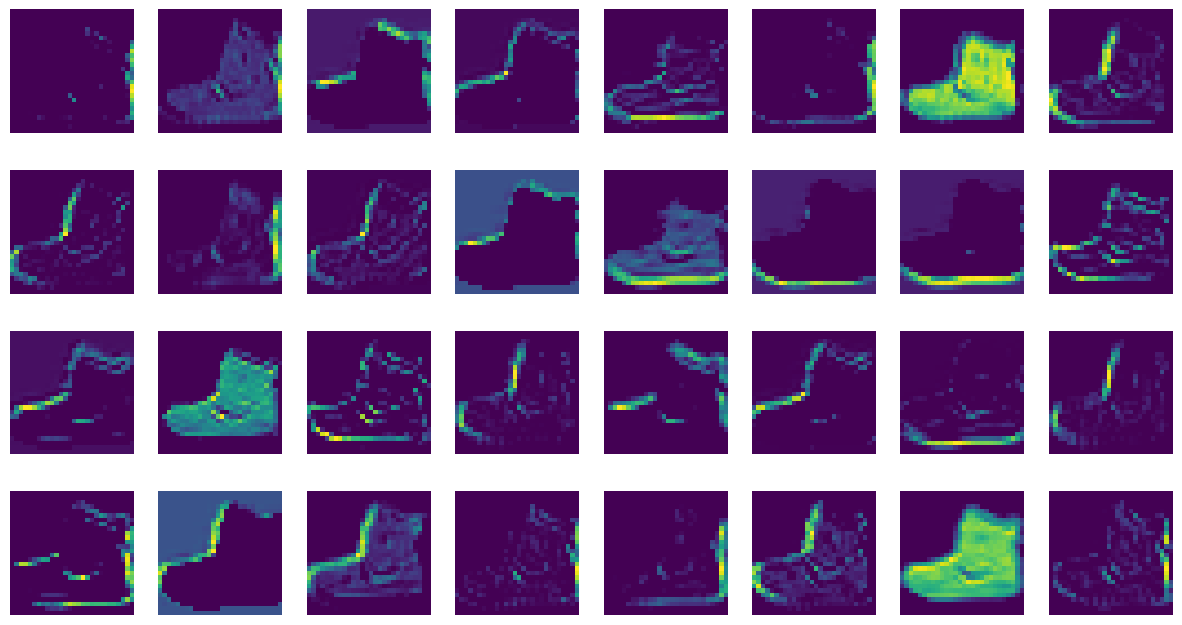

In [26]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [27]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [28]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 77ms/step


In [29]:
print(feature_maps.shape)   # 필터 64개

(1, 14, 14, 64)


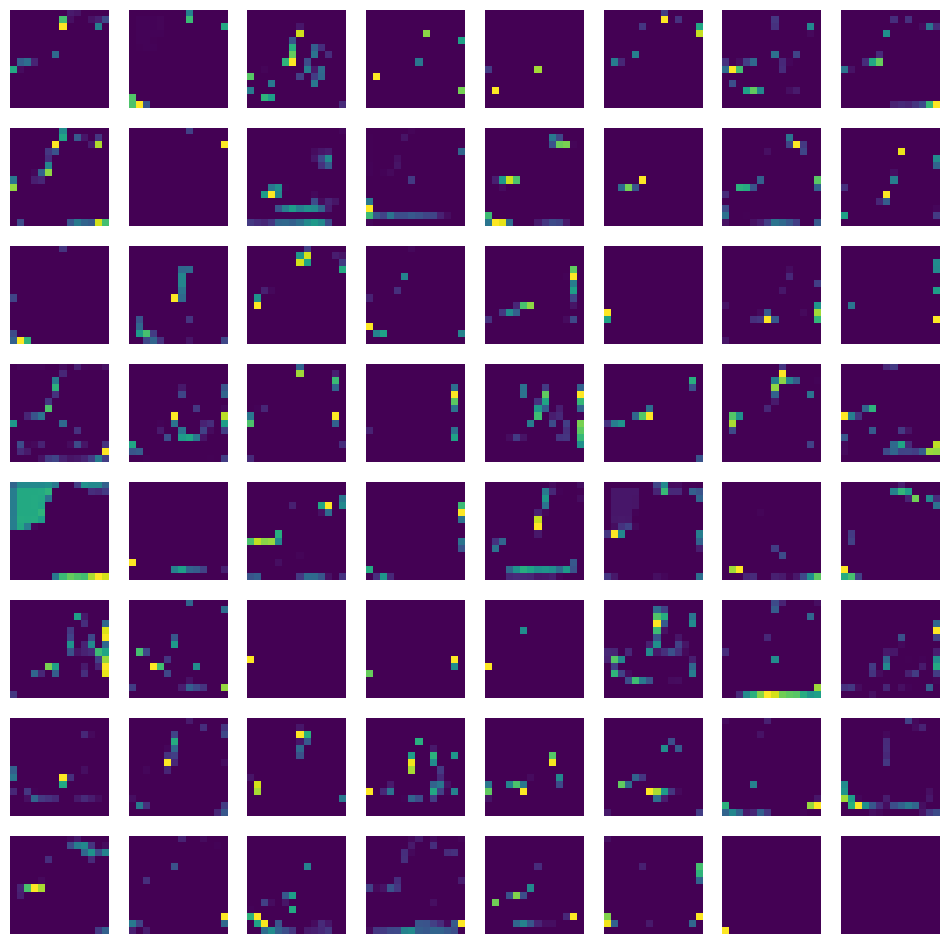

In [30]:
# 낮은 층은 저수준 학습, 층이 깊어질수록 고수준(추상적) 특성 학습
# 깊은 층을 시각화하면 이해하기 어려울 수 있음
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()